1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

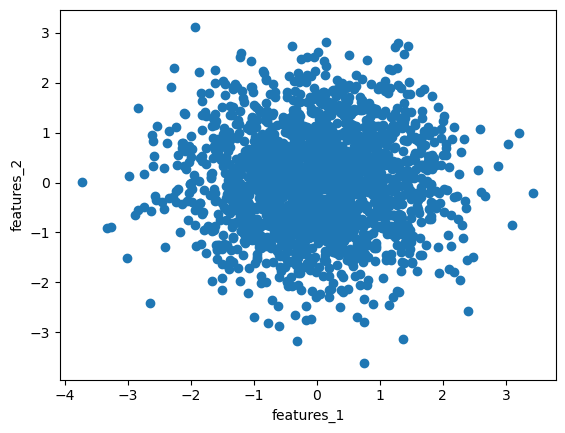

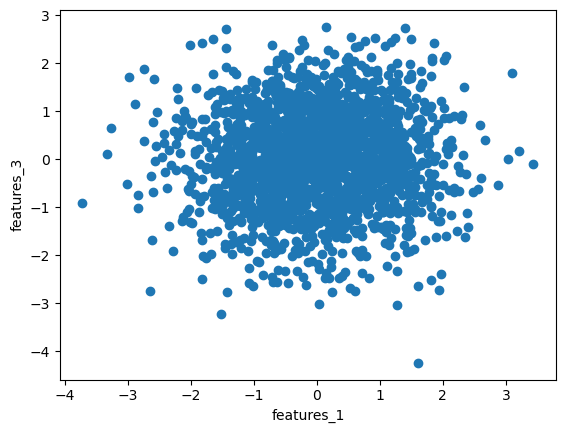

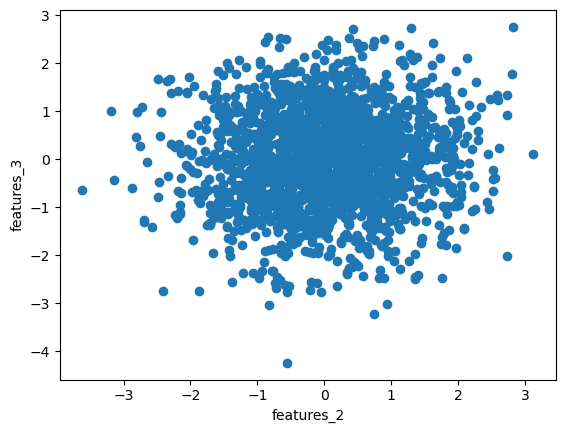

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
import scipy
dataframe = pd.read_csv('https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1')


plt.scatter(dataframe['features_1'], dataframe['features_2'])
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()
plt.scatter(dataframe['features_1'], dataframe['features_3'])
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.show()
plt.scatter(dataframe['features_2'], dataframe['features_3'])
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()
#the features scatter plots indicate low correlation values




2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [2]:
#from IPython.display import Image
#Image('images/two_categories_scatter_plot.png')

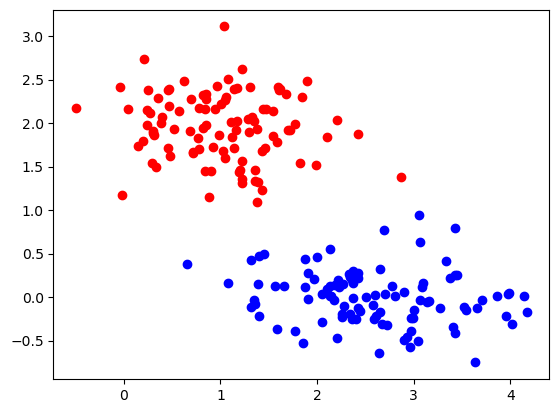

In [3]:
def dataset2D(n1, s1, n2, s2):
    feat1 = np.random.normal(loc=n1, scale=s1, size=(100,))
    feat2 = np.random.normal(loc=n2, scale=s2, size=(100,))
    
    data = np.column_stack((feat1, feat2))
    df = pd.DataFrame(data, columns = ['feat1','feat2'])
    return df

df1 = dataset2D(1, 0.6, 2, 0.4)
df2 = dataset2D(2.5, 0.8, 0, 0.3)
plt.scatter(df1['feat1'], df1['feat2'], color='red')
plt.scatter(df2['feat1'], df2['feat2'], color='blue')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{0: {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}}


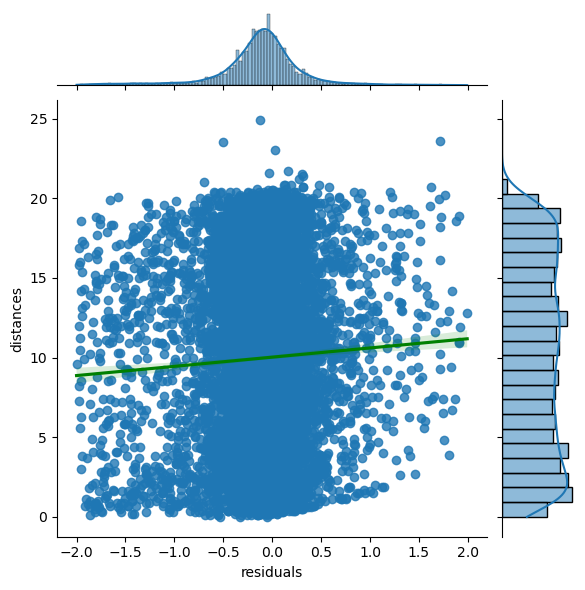


Array of mean values of the residuals:
 [-0.18053968 -0.14835147 -0.11658941 -0.09053693 -0.06917519 -0.12938387
 -0.14441328 -0.10583914  0.05822731  0.41285714]

Array of standard deviation of the residuals:
 [0.4424783839697085, 0.4098040099104869, 0.44089943533208387, 0.41464484092770804, 0.46471269942487714, 0.4720464280871281, 0.4437897427540921, 0.39928691326562543, 0.483077804369413, 0.9422602728379901]


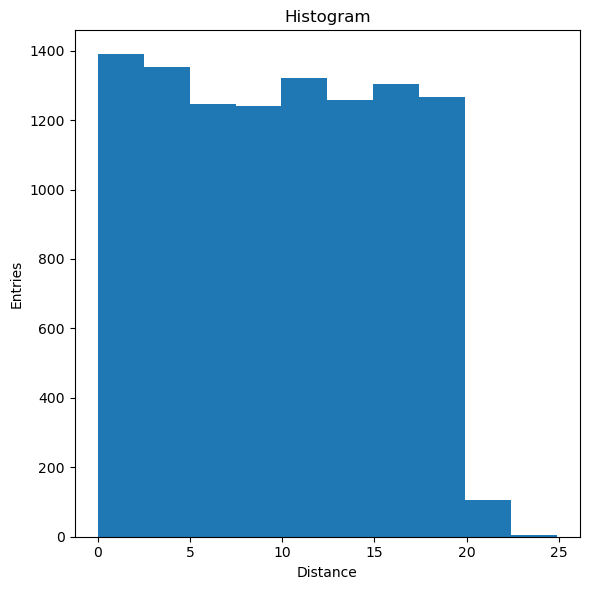

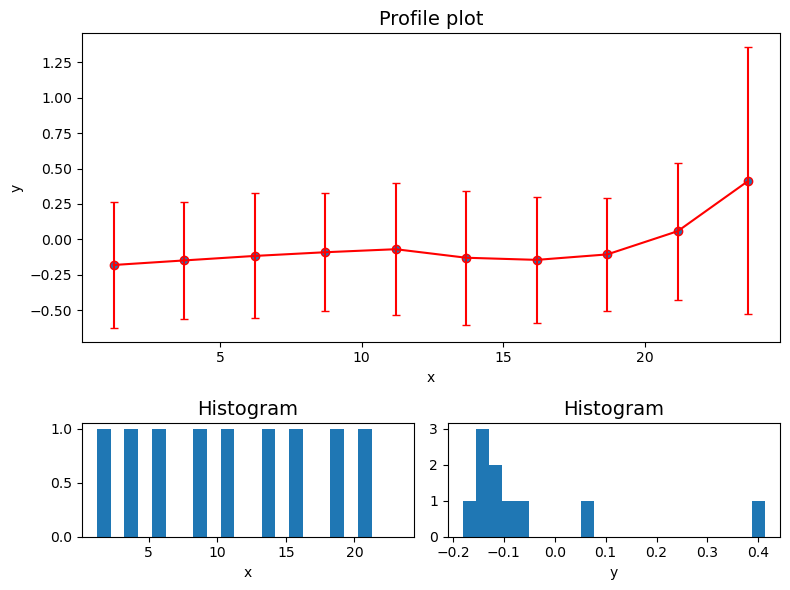

In [4]:
file = pd.read_pickle('data/residuals_261.pkl')

#print("Dataset: \n", file)
#variabili: residuals e distance
mydict = dict(enumerate(file.flatten()))
print(mydict)

df = pd.DataFrame(mydict[0]['residuals'], columns = ['residuals'])
df = df.assign(distances=mydict[0]['distances'])

df = df[abs(df['residuals'])<2]


#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.

sns.jointplot(x="residuals", y="distances", data=df, kind="reg", line_kws={"color":"green"})
plt.show()

#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.

fig = plt.figure(figsize=(6, 6)) # create the figure and the axes
h, bins, _ = plt.hist(df['distances'], bins=int(math.sqrt(df['distances'].count()) / 10))
# get the axes from the figure and pick the first (and only) element (beacuse there is only one axes)
ax = fig.axes[0]
ax.set_title('Histogram')
ax.set_xlabel('Distance')
ax.set_ylabel('Entries')
fig.tight_layout()

x = (bins[:-1]+bins[1:])/2

# y = the mean values of the "residuals", estimated in slices (bins) of "distance"
# err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"

ylist = []
err_yList = []
for dlow, dhigh in zip(bins[:-1], bins[1:]):
    indeces = (df['distances'] >= dlow) & (df['distances'] < dhigh)
    residualmean = df['residuals'][indeces].mean()
    ylist.append(residualmean)
    residualstd = np.std(df['residuals'][indeces])
    err_yList.append(residualstd)

y = np.array(ylist)
err_y = np.array(err_yList)
print("\nArray of mean values of the residuals:\n", y)
print("\nArray of standard deviation of the residuals:\n", err_yList)

gridsize = (3, 4)
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=4, rowspan=2)
ax1.scatter(x=x, y=y, edgecolor='r')
ax1.errorbar(x=x, y=y, yerr=err_y, fmt='r', capsize=3)
ax1.set_title('Profile plot', fontsize=14)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# create the two 1D histograms of single variables
ax2 = plt.subplot2grid(gridsize, (2, 0), colspan=2)
xbins=np.arange(x.min(), x.max())
ax2.hist(x, bins=xbins)
ax2.set_title('Histogram', fontsize=14)
ax2.set_xlabel('x')

ax3 = plt.subplot2grid(gridsize, (2, 2), colspan=2)
ax3.hist(y, bins=xbins.shape[0])
ax3.set_title('Histogram', fontsize=14)
ax3.set_xlabel('y')

plt.tight_layout()

# y = the mean values of the "residuals", estimated in slices (bins) of "distance"
# err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"



**Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


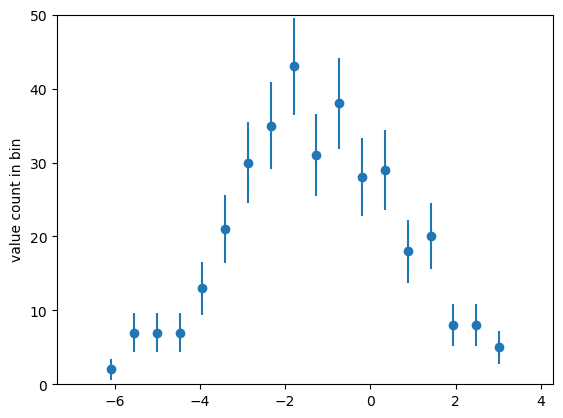

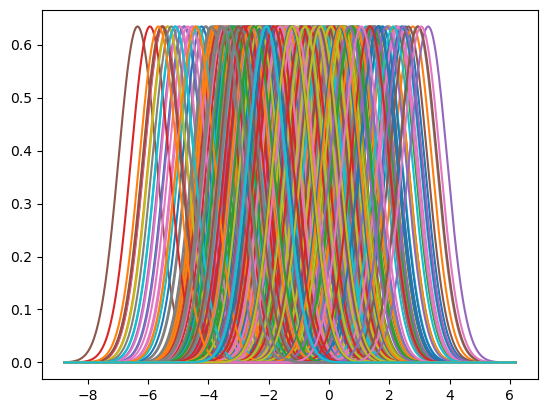

350.0


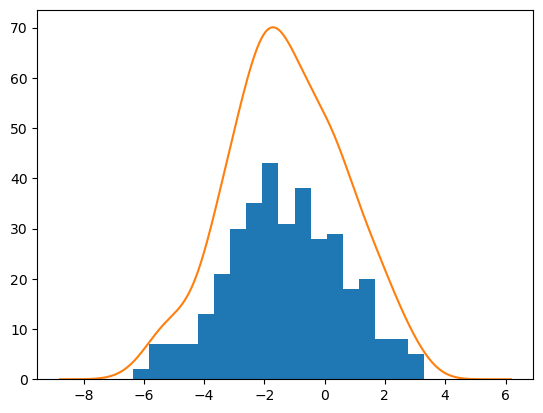

In [5]:
xmean = -1.3
xstd = 1.87
Nsamples=350

x = np.random.normal(loc=xmean, scale=xstd, size=(Nsamples,))
xmin = x.min()
xmax = x.max()
axismin = math.floor(xmin)
axismax = math.ceil(xmax)

b = int(math.sqrt(Nsamples))
counts, bin_edges = np.histogram(x, bins = b)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.ylabel('value count in bin')
plt.xlim([xmin-1, xmax+1])
yval = counts + counts**0.5
ymax = int(yval.max() / 10) * 10 + 10
plt.ylim([0, ymax])
plt.errorbar(bin_centers, counts, yerr=counts**0.5, fmt='o')
plt.show()

xvalues = np.linspace(xmean-4*xstd, xmean+4*xstd, 1000)
sumgauss =  np.zeros(xvalues.shape)
gaussscale = 1.06 * np.std(x) * (x.shape[0]**(-1/5))
newgass=np.zeros([Nsamples,xvalues.shape[0]])

for i in range(Nsamples):
    newgass[i] = norm.pdf(xvalues, loc=x[i], scale=gaussscale)
    plt.plot(xvalues, newgass[i])
    
plt.show()

sumgauss = np.sum(newgass, axis=0)
integral = scipy.integrate.trapz(sumgauss, x = xvalues)
sumgauss = sumgauss * (Nsamples / integral)
print(scipy.integrate.trapz(sumgauss, x = xvalues))

plt.hist(x, bins = b)
plt.plot(xvalues, sumgauss)
plt.show()